'더치페이 요청에 대한 응답률이 높을수록 더치페이 서비스를 더 많이 사용한다' 라는 가설을 통계적으로 검정해주세요.  
- 해당 가설 검정 방법을 선택한 이유와 전체 검정 과정을 기술해주세요

### 결과   

- 더치페이 요청 상세 데이터에서 전체 status의 비율을 확인했을때, CLAIM 비율이 45%, SEND 27%, CHECK 26%임을 알 수 있습니다. 이것은 전체 유저 100% 중에서 27%가 SEND를 했고, 남은 73%가 확인 중이거나 보내지 않았음을 의미합니다.


- 더치페이 데이터에서 더치페이 요청을 가장 많이 한 유저를 기준으로 최대 122번 더치페이 서비스를 사용하였는데, 이 유저를 기준으로 status의 비율은 SEND 56%를 차지합니다. 반대로 SEND 비율이 높은 유저이지만, 더치페이 서비스를 이용안하는 유저가 존재합니다. 이뜻은 더치페이 요청에 대한 응답률과는 상관이 없음을 알 수 있습니다.  


- 더치페이 서비스는 나이대가 20 ~ 40대인 유저들이 많이 사용하며 응답률이 높습니다.


In [635]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
# import plotly.express as px

_, dutchpay, dutchpay_detail, user = [pd.read_csv(i) for i in glob.glob('./*.csv')]

dutchpay.csv   
* claim_id : 더치페이 요청 ID  
* claim_at : 더치페이 요청 일시  
* claum_user_id : 더치페이를 요청한 유저 ID   

dutchpay_detail.csv  
* claim_detail_id : 더치페이 요청 상세 ID
* claim_id : 더치페이 상세 ID
* recv_user_id : 더치페이를 요청 받은 유저ID  
* claim_amount : 더치페이 요청한 금액  
* send_amount : 송금한 금액  
* atatus : 현재 상태  

user.csv  
* user_id : 유저 ID  
* gender_cd : 성별 
* age : 나이  
* foreign_yn : 외국인 여부  
* os_type : 휴대폰 OS 유형



**전체 데이터에서 결측치가 얼마나 되는지 확인**

In [636]:
dutchpay_detail.isnull().sum() / len(dutchpay_detail)

claim_detail_id    0.000000
claim_id           0.000000
recv_user_id       0.000000
claim_amount       0.000000
send_amount        0.458413
status             0.000000
dtype: float64

**상태(status) 비율**

In [637]:
dutchpay_detail['status'].value_counts(normalize=True)

CLAIM    0.458413
SEND     0.275812
CHECK    0.265775
Name: status, dtype: float64

**더치페이를 가장 많이 요청한 유저**

In [638]:
dutchpay["claim_user_id"].value_counts().head(10)

9b2956f3779fffc    122
6a4c2424aa0dcff    110
bbf76f0e6224f6a    107
1906a00cebf75ad     82
3204a58add68196     81
9711a3d185f12c3     76
50c5688e2165a20     74
bd221d46e1c2037     73
1cc6d9adf232745     66
8ba04306ede2213     63
Name: claim_user_id, dtype: int64

**더치페이 요청 유저ID에서 SEND 비율**

In [139]:
# 더치페이 요청을 가장 많이 한 유저목록
claim_user.sort_index()["claim_user_id"].head()

0    9b2956f3779fffc
1    6a4c2424aa0dcff
2    bbf76f0e6224f6a
3    1906a00cebf75ad
4    3204a58add68196
Name: claim_user_id, dtype: object

In [137]:
dutchpay.loc[dutchpay["claim_user_id"] == claim_user.sort_index()["claim_user_id"][0]].head()

,claim_id,claim_at,claim_user_id
52752,4689883,2020-02-29 18:06:39,9b2956f3779fffc
52753,4678551,2020-02-29 16:12:57,9b2956f3779fffc
52754,4678541,2020-02-29 16:12:28,9b2956f3779fffc
52755,4672275,2020-02-29 09:16:14,9b2956f3779fffc
52756,4667650,2020-02-28 20:02:14,9b2956f3779fffc


In [355]:
# 9b2956f3779fffc의 claim_id 를 뽑아서 리스트에 담음.
claim_id_first = dutchpay.loc[dutchpay["claim_user_id"] == claim_user.sort_index()["claim_user_id"][0]]["claim_id"].tolist()

In [358]:
# 더치페이 요청 중 어떤 상태가 많은 비율을 차지 하는가 ? 
user_status = []
for i in claim_id_first:
    user_status.extend(dutchpay_detail.loc[dutchpay_detail["claim_id"] == i]["status"].tolist())
print(pd.DataFrame(user_status)[0].value_counts(normalize=True))

SEND     0.569288
CHECK    0.247191
CLAIM    0.183521
Name: 0, dtype: float64


**더치페이 요청을 가장 많이 안하는 유저**

In [179]:
claim_id_last = dutchpay.loc[dutchpay["claim_user_id"] == claim_user.sort_index()["claim_user_id"][53557]]["claim_id"].tolist()

In [180]:
# 더치페이 요청 중 어떤 상태가 많은 비율을 차지 하는가 ? 
user_status = []
for i in claim_id_last:
    user_status.extend(dutchpay_detail.loc[dutchpay_detail["claim_id"] == i]["status"].tolist())
print(pd.DataFrame(user_status)[0].value_counts(normalize=True))

CHECK    0.5
CLAIM    0.5
Name: 0, dtype: float64


In [214]:
val = []
for i in range(len(claim_user["claim_user_id"])):
    try : 
        claim_id_last = dutchpay.loc[dutchpay["claim_user_id"] == claim_user.sort_index()["claim_user_id"][i]]["claim_id"].tolist()
        user_status = []
        for j in claim_id_last:
            user_status.extend(dutchpay_detail.loc[dutchpay_detail["claim_id"] == j]["status"].tolist())
        val.append(pd.DataFrame(user_status)[0].value_counts(normalize=True)["SEND"])
    except KeyError as e:
        val.append(-1)

In [ ]:
claim_user_status = pd.DataFrame(claim_user["claim_user_id"])
claim_user_status["SEND"] = val

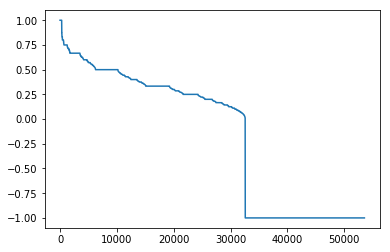

In [619]:
# px.line(claim_user_status.sort_values(by = "SEND", ascending=False)["SEND"].tolist())
plt.plot(claim_user_status.sort_values(by = "SEND", ascending=False)["SEND"].tolist())

**SEND가 높은 순으로 정렬**

In [500]:
send_ = claim_user_status.sort_values(by = "SEND", ascending=False).reset_index(drop=True)
send_.head()

,claim_user_id,SEND
0,239cdd49b6323a1,1.0
1,7a2ad38c74a7419,1.0
2,0d8e17d8a804cd8,1.0
3,572f565f786a73c,1.0
4,2122b4d35d9d4a3,1.0


In [501]:
send_.loc[send_["claim_user_id"] == "9b2956f3779fffc"]

,claim_user_id,SEND
5310,9b2956f3779fffc,0.569288


**그렇다면 ...?** 
- 더치페이 요청한 금액이 클수록 응답하지 않는건가?

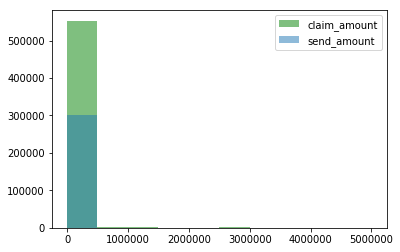

In [489]:
plt.hist(dutchpay_detail["claim_amount"], color = 'green', alpha = 0.5,  label = 'claim_amount') # 요청한 금액
plt.hist(dutchpay_detail["send_amount"],  alpha = 0.5, label = 'send_amount') # 송금한 금액
plt.legend(fontsize = 10)

In [506]:
status_factorize, _ = dutchpay_detail.loc[dutchpay_detail['claim_amount']>3000000]["status"].factorize()

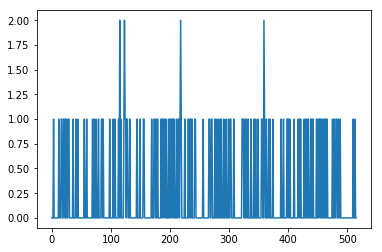

In [507]:
plt.plot(status_factorize)

In [510]:
status_factorize2, _ = dutchpay_detail.loc[dutchpay_detail['claim_amount']<3000000]["status"].factorize()

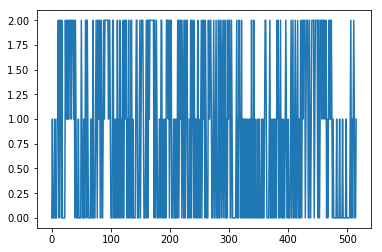

In [514]:
plt.plot(status_factorize2[:len(status_factorize)])

**나이에 따른 상태**

(array([1.3095e+04, 5.4446e+04, 3.4726e+04, 1.5233e+04, 5.3670e+03,
        9.0000e+02, 1.2800e+02, 1.8000e+01, 9.0000e+00, 2.0000e+00]),
 array([14. , 21.5, 29. , 36.5, 44. , 51.5, 59. , 66.5, 74. , 81.5, 89. ]),
 <a list of 10 Patch objects>)

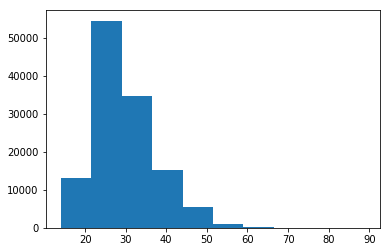

In [517]:
plt.hist(user["age"])

In [532]:
age_20_user = user.loc[user['age']<20].reset_index(drop=True)
age_20_user.head()

,user_id,gender_cd,age,foreigner_yn,os_type
0,4f2bc35ea5f907c,1,19,N,A
1,e055d3995252700,1,17,N,A
2,2478370d5400e77,1,16,N,B
3,d36f461671221d3,2,17,N,A
4,0225fca3e6a5dab,1,17,N,B


In [544]:
age_20_satus =[]
for i in range(len(age_20_user["user_id"])):
    age_20_satus.extend(dutchpay_detail.loc[dutchpay_detail["recv_user_id"] == age_20_user["user_id"][i]]["status"])    

In [555]:
pd.DataFrame(age_20_satus)[0].value_counts(normalize=True)

CHECK    0.700234
SEND     0.196136
CLAIM    0.103630
Name: 0, dtype: float64

In [599]:
age_30_user = user.loc[(user['age']>20)&(user['age']<=30)].reset_index(drop=True)

In [612]:
age_30_satus =[]
for i in range(len(age_30_user["user_id"])):
    age_30_satus.extend(dutchpay_detail.loc[dutchpay_detail["recv_user_id"] == age_30_user["user_id"][i]]["status"])    

In [613]:
pd.DataFrame(age_30_satus)[0].value_counts(normalize=True)

CHECK    0.454318
SEND     0.413953
CLAIM    0.131730
Name: 0, dtype: float64

In [614]:
age_40_user = user.loc[(user['age']>30)&(user['age']<=40)].reset_index(drop=True)

In [616]:
age_40_satus =[]
for i in range(len(age_40_user["user_id"])):
    age_40_satus.extend(dutchpay_detail.loc[dutchpay_detail["recv_user_id"] == age_40_user["user_id"][i]]["status"])    

In [618]:
pd.DataFrame(age_40_satus)[0].value_counts(normalize=True)

SEND     0.499881
CHECK    0.415969
CLAIM    0.084150
Name: 0, dtype: float64